In [1]:
from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba
from cobra.io import read_sbml_model

In [2]:
model = read_sbml_model('../models/Adjusted_models/iMT1026-v3_MalonicAcid.xml')

# Change substrate
medium = model.medium
medium['Ex_glyc'] = 0
medium['Ex_meoh'] = 10
model.medium = medium

## Note: the higher the concentration of substrate and the lower the biomass lower bound, the higher the effect on the model

Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-13


In [3]:
model.objective = model.reactions.MSADH
model.reactions.Ex_biomass.lower_bound = 0.1

In [4]:
model.optimize()

,fluxes,reduced_costs
ADPtn,0.000309,0.000000
ATPtn,-0.000309,-0.000000
FACOAE140,0.000000,0.000000
FACOAL260,0.000000,0.000000
GLCter,0.000000,-0.000000
...,...,...
BIOMASS_meoh,0.000000,-16.035486
BAPTA,0.000000,0.000000
MSADH,1.578387,0.000000
mac_etoEX,1.578387,0.000000


In [5]:
nominal = model.optimize()
loopless = loopless_solution(model)

<AxesSubplot:xlabel='loopless', ylabel='nominal'>

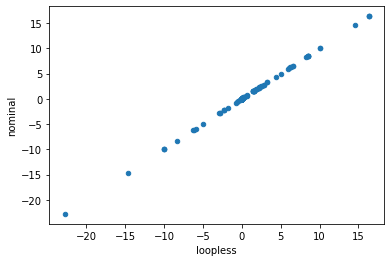

In [6]:
import pandas
df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))
df.plot.scatter(x='loopless', y='nominal')

In [7]:
solution = pfba(model)
print("parsimonious solution: status = " + solution.status)
print("loopless solution flux: MSADH = %.4f" % solution.fluxes["MSADH"], "mmol/(gdw*h)")

parsimonious solution: status = optimal
loopless solution flux: MSADH = 1.5784 mmol/(gdw*h)
